In [8]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import kmedoids
import sort_data
from fastdtw import fastdtw
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [9]:
charge_partial, discharge_partial = sort_data.charge_discharge('converted_PL03.mat')
charge_full, discharge_full = sort_data.charge_discharge('converted_PL11.mat')

In [10]:
#Getting rid of the empty cycle
discharge_full.pop(845)

,time,datetime,step,cycle,current_amp,voltage,charge_ah,discharge_ah


In [68]:
list(discharge_partial.keys()).index(2)

1

In [11]:
new_discharge_full = {}
for m in range(20,900,5):
    if m not in discharge_full.keys():
        pass
    else:
        new_discharge_full[m] = discharge_full[m]
len(new_discharge_full.keys())

160

In [12]:
new_discharge_partial = {}
for m in range(25,975,50):
    if m not in discharge_partial.keys():
        pass
    else:
        new_discharge_partial[m] = discharge_partial[m]
len(new_discharge_partial.keys())

16

In [13]:
#Combine too dicts
z = {**new_discharge_full, **new_discharge_partial}

In [14]:
len(z.keys())

162

In [15]:
def distance_matrix(discharge_partial,discharge_full):
    scale = len(z.keys())
    distance_matrix = np.zeros((scale,scale))
    for m in z.keys():
        index_partial = list(z.keys()).index(m)
        for n in z.keys():
            index_full = list(z.keys()).index(n)
            b = z[m]['voltage']
            c = z[n]['voltage']
            distance, path  = fastdtw(b,c)
            distance_matrix[index_partial,index_full] = distance
    return distance_matrix

In [16]:
dm = distance_matrix(discharge_partial,discharge_full)

In [18]:
dm.shape

(162, 162)

In [20]:
medoid, cluster = kmedoids.kMedoids(dm, 10)
print(medoid)
print(cluster)

[ 87  19  39  92 112 127  90 133 145 157]
{0: array([  1,  11,  21,  31,  41,  51,  60,  70,  77,  87,  97, 117, 146,
       155, 160, 161], dtype=int64), 1: array([ 0,  3,  4,  7, 12, 14, 15, 16, 17, 18, 19, 24, 25, 27, 29, 33, 35,
       37, 40, 43, 44, 45, 46, 47, 50, 57, 58, 59, 61, 62, 63, 66, 69, 71,
       72, 73, 74, 80, 83], dtype=int64), 2: array([ 2,  5,  6,  8,  9, 10, 13, 20, 22, 23, 26, 28, 30, 32, 34, 36, 38,
       39, 42, 48, 49, 52, 53, 54, 55, 56, 64, 65, 67, 68, 75, 76, 81],
      dtype=int64), 3: array([ 78,  79,  84,  85,  88,  89,  91,  92,  93,  95,  96,  98, 100,
       101, 103, 105], dtype=int64), 4: array([102, 104, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116],
      dtype=int64), 5: array([109, 119, 120, 124, 125, 126, 127, 128, 129, 130, 135, 136, 137,
       138], dtype=int64), 6: array([82, 86, 90, 94, 99], dtype=int64), 7: array([118, 121, 122, 123, 131, 132, 133, 134, 148, 150], dtype=int64), 8: array([140, 145, 147, 149, 152], dtype=int64), 9: ar

C:\Users\liu0563\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


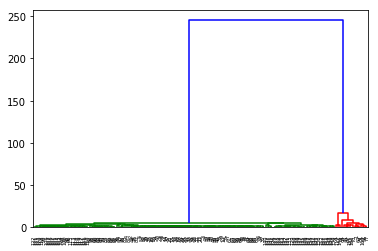

In [23]:
Z = linkage(dm, 'single')
dn = dendrogram(Z)
plt.show()

In [89]:
D = np.insert(D,2,3,axis = 1)

In [4]:
data = np.array([[1,1], 
                [2,2], 
                [10,10]])
D = pairwise_distances(data, metric='euclidean')
D[0,0] = 1
D[2,2] = 1
D[0,1] = 3
D = np.insert(D,2,3,axis = 1)
D

array([[ 1.        ,  3.        ,  3.        , 12.72792206],
       [ 1.41421356,  0.        ,  3.        , 11.3137085 ],
       [12.72792206, 11.3137085 ,  3.        ,  1.        ]])

In [91]:
D

array([[ 1.        ,  3.        ,  3.        ,  3.        , 12.72792206],
       [ 1.41421356,  0.        ,  3.        ,  3.        , 11.3137085 ],
       [12.72792206, 11.3137085 ,  3.        ,  3.        ,  1.        ]])

In [5]:
M, C = kmedoids.kMedoids(D, 2)

In [6]:
M

array([1, 2])

In [61]:
M, C = kmedoids.kMedoids(D, 2)
# 3 points in dataset
data = np.array([[1,1], 
                [2,2], 
                [10,10]])

# distance matrix
D = pairwise_distances(data, metric='euclidean')

# split into 2 clusters
M, C = kmedoids.kMedoids(dm, 2)

print('medoids:')
for point_idx in M:
    print( data[point_idx] )

print('')
print('clustering result:')
for label in C:
    for point_idx in C[label]:
        print('label {0}:　{1}'.format(label, data[point_idx]))

medoids:


IndexError: index 9 is out of bounds for axis 0 with size 3